# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [5]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [6]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [75]:
#  1. Get the total rides for each city type
rides_city_type_df = pyber_data_df.groupby(["type"]).count()[["ride_id"]]
rides_city_type_df

,ride_id
type,
Rural,125
Suburban,625
Urban,1625


In [76]:
# 2. Get the total drivers for each city type
driver_count_df = city_data_df.groupby(["type"]).sum()[["driver_count"]]
driver_count_df

,driver_count
type,
Rural,78
Suburban,490
Urban,2405


In [29]:
#  3. Get the total amount of fares for each city type
fare_city_type_df = pyber_data_df.groupby(["type"]).sum()["fare"]
fare_city_type_df

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [40]:
#  4. Get the average fare per ride for each city type. 
average_fare_per_ride_df = fare_city_type_df/ rides_city_type_df
average_fare_per_ride_df

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [44]:
# 5. Get the average fare per driver for each city type. 
average_fare_per_driver_df = fare_city_type_df / driver_count_df
average_fare_per_driver_df

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [47]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({
     "Total Rides" : rides_city_type_df,
          "Total Drivers": driver_count_df,
          "Total Fares": fare_city_type_df,
          "Average Fare per Ride": average_fare_per_ride_df,
          "Average Fare Per Driver": average_fare_per_driver_df})
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare Per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [48]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare Per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [71]:
#  8. Format the columns.
pyber_summary_df = pd.DataFrame({
     "Total Rides" : rides_city_type_df,
          "Total Drivers": driver_count_df,
          "Total Fares": fare_city_type_df,
          "Average Fare per Ride": average_fare_per_ride_df,
          "Average Fare Per Driver": average_fare_per_driver_df})

pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map('{:,d}'.format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map('{:,d}'.format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare Per Driver"] = pyber_summary_df["Average Fare Per Driver"].map("${:,.2f}".format)

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare Per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# 1. Read the merged DataFrame


In [74]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
fares_by_date= pyber_data_df.groupby(["type","date"]).sum()[["fare"]]
fares_by_date.tail(10)

fare
type  date                      
Urban 2019-05-07 17:27:48   6.39
      2019-05-07 20:05:15  24.20
      2019-05-07 20:22:19  18.74
      2019-05-08 01:54:18  32.69
      2019-05-08 02:31:25  41.33
      2019-05-08 04:20:00  21.99
      2019-05-08 04:39:49  18.45
      2019-05-08 07:29:01  18.55
      2019-05-08 11:38:35  19.77
      2019-05-08 13:10:18  18.04

In [77]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
fares_by_date = fares_by_date.reset_index()
fares_by_date.tail(10)

,type,date,fare
2365,Urban,2019-05-07 17:27:48,6.39
2366,Urban,2019-05-07 20:05:15,24.20
2367,Urban,2019-05-07 20:22:19,18.74
2368,Urban,2019-05-08 01:54:18,32.69
2369,Urban,2019-05-08 02:31:25,41.33
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77
2374,Urban,2019-05-08 13:10:18,18.04


In [80]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
fares_by_date_pivot = fares_by_date.pivot(index = "date", columns = "type", values = "fare" )
fares_by_date_pivot.tail(10)

type,Rural,Suburban,Urban
date,,,
2019-05-07 20:05:15,NaN,NaN,24.20
2019-05-07 20:22:19,NaN,NaN,18.74
2019-05-07 20:40:29,NaN,24.89,NaN
2019-05-08 01:54:18,NaN,NaN,32.69
2019-05-08 02:31:25,NaN,NaN,41.33
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55
2019-05-08 11:38:35,NaN,NaN,19.77


In [93]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
fares_by_date_Jan_Apr = fares_by_date_pivot.loc[(fares_by_date_pivot["date"] >= "2019-01-01") & 
                                                (fares_by_date_pivot["date"] <= "2019-04-29") ]
fares_by_date_Jan_Apr

KeyError: 'date'

In [96]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)


fares_by_date_pivot.index = pd.to_datetime(fares_by_date_pivot.index)
fares_by_date_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [97]:
# 7. Check that the datatype for the index is datetime using df.info()
fares_by_date_pivot.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-01 00:08:16 to 2019-05-08 13:10:18
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     125 non-null    float64
 1   Suburban  625 non-null    float64
 2   Urban     1625 non-null   float64
dtypes: float64(3)
memory usage: 74.2 KB


In [98]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
fares_by_date_week = fares_by_date_pivot.resample("W").sum()
fares_by_date_week.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


Text(0.5, 1.0, 'PyBer Fare by Month')

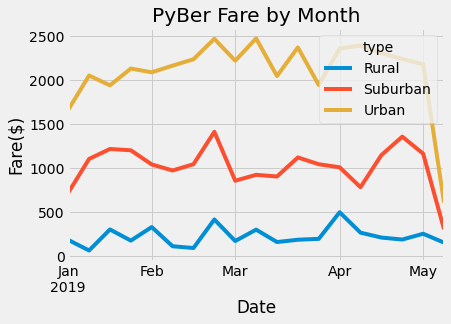

In [105]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
x_axis = "date"
y_axis = "fare"

fares_by_date_week.plot()
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
plt.xlabel("Date")
plt.ylabel("Fare($)")
plt.title("PyBer Fare by Month")

